In [1]:
import keras
import numpy as np

#from keras.applications import vgg16, inception_v3, resnet50, mobilenet
from keras.applications import inception_v3
from keras.applications import resnet50  
from keras.applications import mobilenet

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt

resnet_model = resnet50.ResNet50(weights='imagenet')
#mobilenet_model = mobilenet.MobileNet(weights='imagenet')
#inception_model = inception_v3.InceptionV3(weights='imagenet')
# vgg_model = vgg16.VGG16(weights='imagenet')


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
102858752/102853048 [==============================] - 71s 1us/step


PIL image size (224, 224)
numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


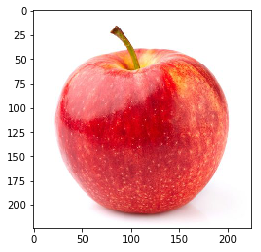

In [14]:
import os
cd = os.getcwd()
filename = 'apple-red-icon.jpg'
filepath = os.path.join(cd, filename)

# load an image in PIL format
original = load_img(filepath, target_size=(224, 224))
#plt.imshow(original)
#plt.show()
print('PIL image size',original.size)

# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
#plt.imshow(np.uint8(numpy_image))
#plt.show()
print('numpy array size',numpy_image.shape)

# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [15]:
# ResNet50 Network
# prepare the image for the ResNet50 model
processed_image = resnet50.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = resnet_model.predict(processed_image)

# convert the probabilities to class labels
# If you want to see the top 3 predictions, specify it using the top argument
label_resnet = decode_predictions(predictions, top=3)
print(label_resnet)

[[('n07768694', 'pomegranate', 0.5577469), ('n07742313', 'Granny_Smith', 0.10381672), ('n07753592', 'banana', 0.06778761)]]


In [17]:
# MobileNet Network

# prepare the image for the MobileNet model
processed_image = mobilenet.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = mobilenet_model.predict(processed_image)

# convert the probabilities to imagenet class labels
label_mobilenet = decode_predictions(predictions)
print(label_mobilenet)

[[('n02123597', 'Siamese_cat', 0.99958926), ('n02124075', 'Egyptian_cat', 0.00014963854), ('n02119022', 'red_fox', 0.00010086105), ('n02127052', 'lynx', 6.523858e-05), ('n02441942', 'weasel', 2.8679815e-05)]]


In [6]:
# Inception_V3 Network
# The input size for inception network is (299, 299)

# load an image in PIL format
original = load_img(filepath, target_size=(299, 299))

# Convert the PIL image into numpy array
numpy_image = img_to_array(original)

# reshape data in terms of batchsize
image_batch = np.expand_dims(numpy_image, axis=0)

# prepare the image for the Inception model
processed_image = inception_v3.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = inception_model.predict(processed_image)

# convert the probabilities to class labels
label_inception = decode_predictions(predictions)
print(label_inception)

[[('n02123597', 'Siamese_cat', 0.981296), ('n02119789', 'kit_fox', 0.000499371), ('n02124075', 'Egyptian_cat', 0.00043714192), ('n02127052', 'lynx', 0.00040774076), ('n02492035', 'capuchin', 0.00025076506)]]


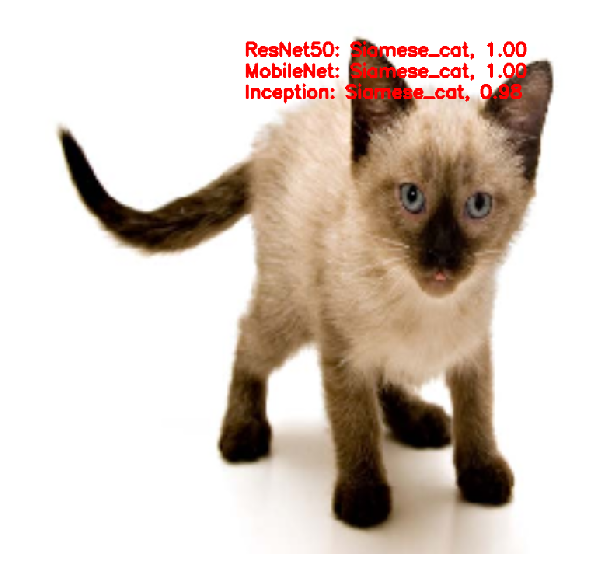

In [19]:
import cv2
numpy_image = np.uint8(img_to_array(original)).copy()
numpy_image = cv2.resize(numpy_image,(900,900))

#cv2.putText(numpy_image, "VGG16: {}, {:.2f}".format(label_vgg[0][0][1], label_vgg[0][0][2]) , (350, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(numpy_image, "ResNet50: {}, {:.2f}".format(
    label_resnet[0][0][1], 
    label_resnet[0][0][2]), 
    (350, 75), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(numpy_image, "MobileNet: {}, {:.2f}".format(
    label_mobilenet[0][0][1], 
    label_mobilenet[0][0][2]), 
    (350, 110), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(numpy_image, "Inception: {}, {:.2f}".format(
    label_inception[0][0][1], 
    label_inception[0][0][2]), 
    (350, 145), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
numpy_image = cv2.resize(numpy_image, (700,700))
#cv2.imwrite("images/{}_output.jpg".format(filename.split('/')[-1].split('.')[0]),cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR))

plt.figure(figsize=[10, 10])
plt.imshow(numpy_image)
plt.axis('off')
plt.show()